# 1. Data from NCBI

results: 
- length: 16-512
- species: 12
- similarity: 95

In [1]:
%matplotlib inline

In [2]:
from Bio import SeqIO

# 读取FASTA文件
fasta_file = "../data/5utr_ncbi_sequences.fasta"  # 请将此替换为你的FASTA文件路径
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# 统计序列数量
num_sequences = len(sequences)
print(f"FASTA文件中共有 {num_sequences} 个序列。")

# 获取所有序列的长度
sequence_lengths = [len(record.seq) for record in sequences]

# 找出最长和最短的序列长度
max_length = max(sequence_lengths)
min_length = min(sequence_lengths)

print(f"最长的序列长度为 {max_length}。")
print(f"最短的序列长度为 {min_length}。")

FASTA文件中共有 37240 个序列。
最长的序列长度为 5129。
最短的序列长度为 1。


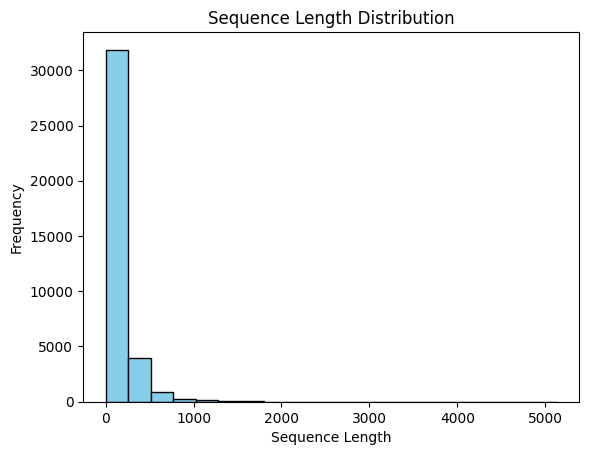

In [3]:
import matplotlib.pyplot as plt
# 绘制序列长度的分布图
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

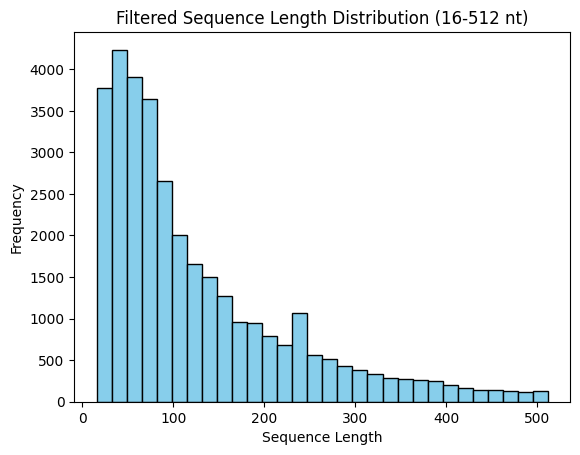

长度在16到512之间的序列共有 33414 个。


In [4]:
# 筛选长度在16到512之间的序列
filtered_sequences = [record for record in sequences if 16 <= len(record.seq) <= 512]

# 获取筛选后序列的长度
filtered_lengths = [len(record.seq) for record in filtered_sequences]

# 绘制筛选后序列长度的分布图
plt.hist(filtered_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Filtered Sequence Length Distribution (16-512 nt)')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# 输出筛选后的序列数量
num_filtered_sequences = len(filtered_sequences)
print(f"长度在16到512之间的序列共有 {num_filtered_sequences} 个。")

## 16-512长度序列的生物种类信息

In [5]:
from collections import Counter
# 提取生物种类信息
species_codes = [record.description.split()[-1] for record in filtered_sequences]

# 统计每种生物种类的个数
species_count = Counter(species_codes)

# 打印生物种类及其数量
print("生物种类及其数量：")
total = 0
for species, count in species_count.items():
    total += 1
    print(f"{species}: {count}")

print(f"total number of species: {total}")

# 写入到新的FASTA文件
output_file = "../data/5utr_ncbi_16to512.fasta"  # 输出文件的名称
with open(output_file, 'w') as output_handle:
    for record in filtered_sequences:
        # 手动格式化FASTA记录
        header = f">{record.description}\n"
        sequence = str(record.seq) + "\n"
        output_handle.write(header)
        output_handle.write(sequence)

print(f"筛选后的序列已保存到 {output_file}")

生物种类及其数量：
VRT: 7386
VRL: 1493
PAT: 57
PLN: 12128
PRI: 2919
INV: 4429
HTC: 1147
ROD: 2227
MAM: 1455
BCT: 124
ENV: 49
total number of species: 11
筛选后的序列已保存到 ../data/5utr_ncbi_16to512.fasta


#### 90%: 删除相似度大于90%的序列 using CD-HIT

In [6]:
import subprocess
# 定义输入和输出文件
input_file = "../data/5utr_ncbi_16to512.fasta"  # 输入的FASTA文件
output_file = "../data/5utr_ncbi_16to512_90.fasta"  # 去冗余后的输出文件

# 定义CD-HIT命令和参数
# conda install -c bioconda cd-hit
cd_hit_command = [
    "cd-hit",  # CD-HIT命令
    "-i", input_file,  # 输入文件
    "-o", output_file,  # 输出文件
    "-c", "0.9"  # 相似度阈值
]

# 运行CD-HIT命令
subprocess.run(cd_hit_command)

print(f"CD-HIT处理完成，结果已保存到 {output_file}")

Program: CD-HIT, V4.7, Jul 13 2018, 10:15:23
Command: cd-hit -i ../data/5utr_ncbi_16to512.fasta -o
         ../data/5utr_ncbi_16to512_90.fasta -c 0.9

Started: Thu Aug 22 21:13:34 2024
                            Output                              
----------------------------------------------------------------
total seq: 33414
longest and shortest : 512 and 16
Total letters: 4219053
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 8M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 85M

Table limit with the given memory limit:
Max number of representatives: 2425419
Max number of word counting entries: 89289401

comparing sequences from          0  to      33414
..........    10000  finished       7605  clusters
..........    20000  finished      15558  clusters
..........    30000  finished      22667  clusters
...
    33414  finished      24098  clusters

Apprixmated maximum memory consumpti

#### 95%: 删除相似度大于95%的序列 using CD-HIT

In [7]:
input_file = "../data/5utr_ncbi_16to512.fasta"  # 输入的FASTA文件
output_file = "../data/5utr_ncbi_16to512_95.fasta"  # 去冗余后的输出文件

# 定义CD-HIT命令和参数
# conda install -c bioconda cd-hit
cd_hit_command = [
    "cd-hit",  # CD-HIT命令
    "-i", input_file,  # 输入文件
    "-o", output_file,  # 输出文件
    "-c", "0.95"  # 相似度阈值
]

# 运行CD-HIT命令
subprocess.run(cd_hit_command)
print(f"CD-HIT处理完成，结果已保存到 {output_file}")

Program: CD-HIT, V4.7, Jul 13 2018, 10:15:23
Command: cd-hit -i ../data/5utr_ncbi_16to512.fasta -o
         ../data/5utr_ncbi_16to512_95.fasta -c 0.95

Started: Thu Aug 22 21:15:25 2024
                            Output                              
----------------------------------------------------------------
total seq: 33414
longest and shortest : 512 and 16
Total letters: 4219053
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 8M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 85M

Table limit with the given memory limit:
Max number of representatives: 2425419
Max number of word counting entries: 89289401

comparing sequences from          0  to      33414
..........    10000  finished       7861  clusters
..........    20000  finished      15971  clusters
..........    30000  finished      23380  clusters
...
    33414  finished      25780  clusters

Apprixmated maximum memory consumpt

FASTA文件中共有 25780 个序列。


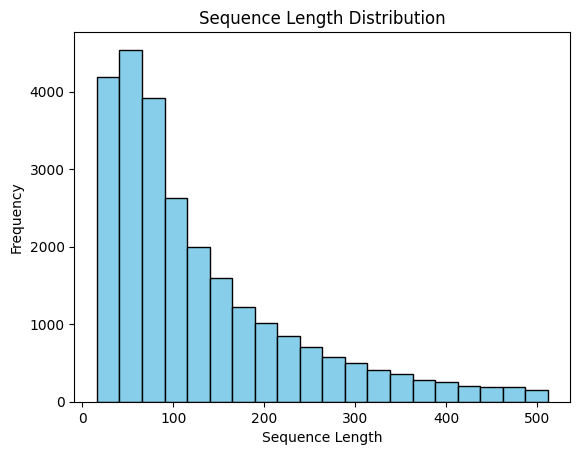

生物种类及其数量：
VRT: 5596
PAT: 44
PLN: 10273
PRI: 2210
INV: 3386
ROD: 1790
MAM: 1057
BCT: 122
HTC: 982
VRL: 278
ENV: 42
total number of species: 11


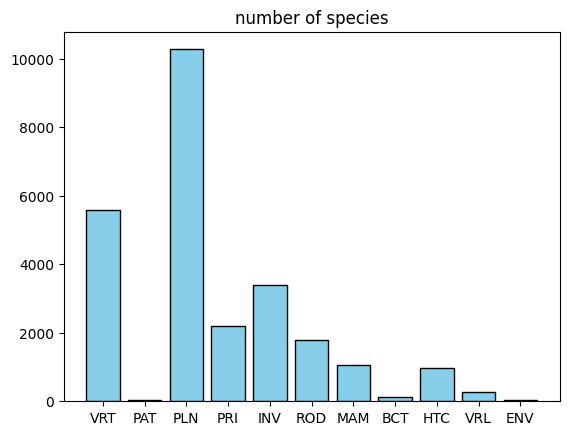

In [8]:
# 读取FASTA文件
fasta_file = "../data/5utr_ncbi_16to512_95.fasta"
sequences_95 = list(SeqIO.parse(fasta_file, "fasta"))

# 统计序列数量
num_sequence = len(sequences_95)
print(f"FASTA文件中共有 {num_sequence} 个序列。")

# 获取所有序列的长度
sequence_lengths = [len(record.seq) for record in sequences_95]

# 绘制序列长度的分布图
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# 提取生物种类信息
species_codes = [record.description.split()[-1] for record in sequences_95]

# 统计每种生物种类的个数
species_count = Counter(species_codes)

# 打印生物种类及其数量
print("生物种类及其数量：")
total = 0
species_num_list = []
species_list = []
for species, count in species_count.items():
    total += 1
    species_list.append(species)
    species_num_list.append(count)
    print(f"{species}: {count}")

print(f"total number of species: {total}")

plt.figure()
plt.bar(species_list, species_num_list, color='skyblue', edgecolor='black')
plt.title("number of species")
plt.show()

# 2 Data from UTRdb

In [21]:
import pandas as pd

# 读取CSV文件
csv_file = '../data/5utr_utrdb2.csv'
data = pd.read_csv(csv_file)

# 定义输出FASTA文件
fasta_file = '../data/5utr_utrdb2.fasta'

# 打开FASTA文件进行写入
utrdb_sequence_lengths = []
with open(fasta_file, 'w') as f:
    for index, row in data.iterrows():
        sequence = row['seq']
        seq_length = len(sequence)
        utrdb_sequence_lengths.append(seq_length)
        header = f"> {seq_length} PRI\n"
        f.write(header)
        f.write(sequence + '\n')

print(f"FASTA文件已成功保存到 {fasta_file}")

FASTA文件已成功保存到 ../data/5utr_utrdb2.fasta


utrdb_中共有 109011 个序列。
长度在16到512之间的序列共有 100415 个。
筛选后的序列已保存到 ../data/5utr_utrdb2_16to512.fasta


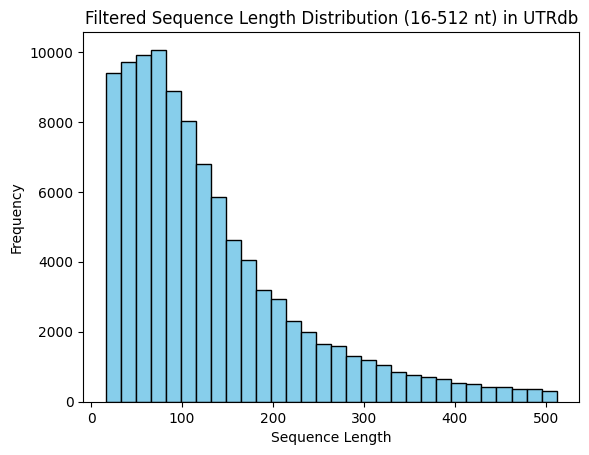

In [22]:
# 读取FASTA文件
fasta_file = '../data/5utr_utrdb2.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))
num_sequences = len(sequences)
print(f"utrdb_中共有 {num_sequences} 个序列。")

# 筛选长度在16到512之间的序列
filtered_sequences = [record for record in sequences if 16 <= len(record.seq) <= 512]

# 输出筛选后的序列数量
num_filtered_sequences = len(filtered_sequences)
print(f"长度在16到512之间的序列共有 {num_filtered_sequences} 个。")

# 写入到新的FASTA文件
filtered_file = "../data/5utr_utrdb2_16to512.fasta"  # 输出文件的名称

# 打开输出文件进行写入
with open(filtered_file, 'w') as output_handle:
    for record in filtered_sequences:
        # 直接使用原始的头部信息
        header = f">{record.description}\n"
        # 将序列转换为字符串，并确保只占一行
        sequence = str(record.seq) + "\n"
        output_handle.write(header)
        output_handle.write(sequence)

print(f"筛选后的序列已保存到 {filtered_file}")

# 获取筛选后序列的长度
filtered_lengths = [len(record.seq) for record in filtered_sequences]

# 绘制筛选后序列长度的分布图
plt.hist(filtered_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Filtered Sequence Length Distribution (16-512 nt) in UTRdb')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

#### 95%: 删除相似度大于95%的序列 using CD-HIT

In [11]:
output_file = "../data/5utr_utrdb2_16to512_95.fasta"  # 去冗余后的输出文件
input_file = "../data/5utr_utrdb2_16to512.fasta"
# 定义CD-HIT命令和参数
# conda install -c bioconda cd-hit
cd_hit_command = [
    "cd-hit",  # CD-HIT命令
    "-i", input_file,  # 输入文件
    "-o", output_file,  # 输出文件
    "-c", "0.95"  # 相似度阈值
]

# 运行CD-HIT命令
subprocess.run(cd_hit_command)
print(f"CD-HIT处理完成，结果已保存到 {output_file}")

Program: CD-HIT, V4.7, Jul 13 2018, 10:15:23
Command: cd-hit -i ../data/5utr_utrdb2_16to512.fasta -o
         ../data/5utr_utrdb2_16to512_95.fasta -c 0.95

Started: Thu Aug 22 21:17:24 2024
                            Output                              
----------------------------------------------------------------
total seq: 100415
longest and shortest : 512 and 16
Total letters: 13206408
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 25M
Buffer          : 1 X 11M = 11M
Table           : 1 X 66M = 66M
Miscellaneous   : 1M
Total           : 105M

Table limit with the given memory limit:
Max number of representatives: 2477217
Max number of word counting entries: 86861142

comparing sequences from          0  to     100415
..........    10000  finished       7589  clusters
..........    20000  finished      14190  clusters
..........    30000  finished      20261  clusters
..........    40000  finished      26098  clusters
..........    50000  f

# 3. ensembl

ensemble_中共有 214349 个序列。
长度在16到512之间的序列共有 191625 个。
筛选后的序列已保存到 ../data/5utr_ensembl_16to512.fasta


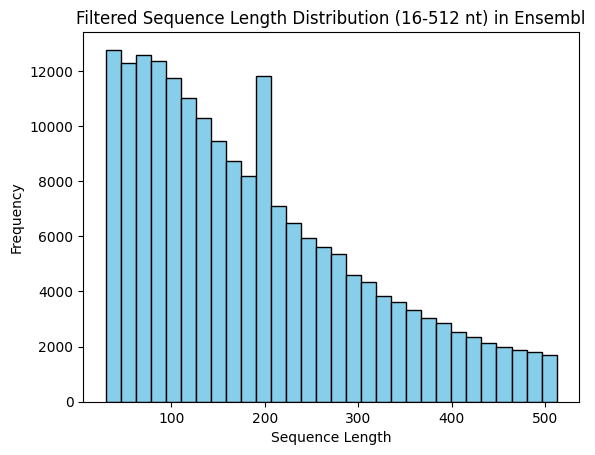

In [18]:
# 读取FASTA文件
fasta_file = '../data/5utr_ensembl.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))
num_sequences = len(sequences)
print(f"ensemble_中共有 {num_sequences} 个序列。")

# 筛选长度在16到512之间的序列
filtered_sequences = [record for record in sequences if 16 <= len(record.seq) <= 512]

# 输出筛选后的序列数量
num_filtered_sequences = len(filtered_sequences)
print(f"长度在16到512之间的序列共有 {num_filtered_sequences} 个。")

# 写入到新的FASTA文件
filtered_file = "../data/5utr_ensembl_16to512.fasta"  # 输出文件的名称

# 打开输出文件进行写入
with open(filtered_file, 'w') as output_handle:
    for record in filtered_sequences:
        # 直接使用原始的头部信息
        header = f">{record.description}\n"
        # 将序列转换为字符串，并确保只占一行
        sequence = str(record.seq) + "\n"
        output_handle.write(header)
        output_handle.write(sequence)

print(f"筛选后的序列已保存到 {filtered_file}")

# 获取筛选后序列的长度
filtered_lengths = [len(record.seq) for record in filtered_sequences]

# 绘制筛选后序列长度的分布图
plt.hist(filtered_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Filtered Sequence Length Distribution (16-512 nt) in Ensembl')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# merge 5'utrs from NCBI & UTRdb2.0 & enssembl

规范ncbi的fasta文件格式

In [23]:
fasta_file1 = "../data/5utr_ncbi_16to512.fasta"
fasta_file2 = "../data/5utr_utrdb2_16to512.fasta"
fasta_file3 = "../data/5utr_ensembl_16to512.fasta"
# 定义合并后的FASTA文件路径
merged_fasta_file = '../data/5utr.fasta'

# 读取并合并FASTA文件内容
with open(fasta_file1, 'r') as file1, open(fasta_file2, 'r') as file2, open(fasta_file3, 'r') as file3, open(merged_fasta_file, 'w') as merged_file:
    # 写入第一个文件的内容
    for line in file1:
        if line.startswith('>'):
             # 提取序列长度和类型信息
             parts = line.split()
             if len(parts) >= 3:
                 seq_length = parts[1]
                 seq_type = parts[3]
                 # 构建新的头部信息
                 new_header = f"> {seq_length} {seq_type}\n"
                 merged_file.write(new_header)
        else:
            merged_file.write(line)
    
    # 写入第二个文件的内容
    for line in file2:
        merged_file.write(line)

    # 写入第三个文件的内容
    for line in file3:
        merged_file.write(line)

print(f"FASTA文件已成功合并到 {merged_fasta_file}")

FASTA文件已成功合并到 ../data/5utr.fasta


In [24]:
output_file = "../data/5utr_95.fasta"  # 去冗余后的输出文件
input_file = "../data/5utr.fasta"
# 定义CD-HIT命令和参数
# conda install -c bioconda cd-hit
cd_hit_command = [
    "cd-hit",  # CD-HIT命令
    "-i", input_file,  # 输入文件
    "-o", output_file,  # 输出文件
    "-c", "0.95"  # 相似度阈值
]

# 运行CD-HIT命令
subprocess.run(cd_hit_command)
print(f"CD-HIT处理完成，结果已保存到 {output_file}")

Program: CD-HIT, V4.7, Jul 13 2018, 10:15:23
Command: cd-hit -i ../data/5utr.fasta -o ../data/5utr_95.fasta
         -c 0.95

Started: Thu Aug 22 22:23:06 2024
                            Output                              
----------------------------------------------------------------
total seq: 325454
longest and shortest : 512 and 16
Total letters: 53706765
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 92M
Buffer          : 1 X 14M = 14M
Table           : 1 X 70M = 70M
Miscellaneous   : 4M
Total           : 181M

Table limit with the given memory limit:
Max number of representatives: 1865073
Max number of word counting entries: 77286771

comparing sequences from          0  to     325454
..........    10000  finished       8286  clusters
..........    20000  finished      15883  clusters
..........    30000  finished      23153  clusters
..........    40000  finished      30204  clusters
..........    50000  finished      36885  clusters
.

FASTA文件中共有 163920 个序列。
生物种类及其数量：
VRT: 49049
PAT: 33
PLN: 10129
INV: 3325
ROD: 49082
PRI: 49910
MAM: 998
BCT: 121
HTC: 957
VRL: 274
ENV: 42
total number of species: 11


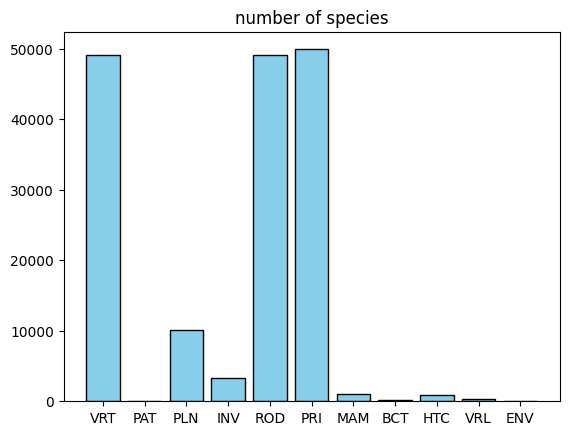

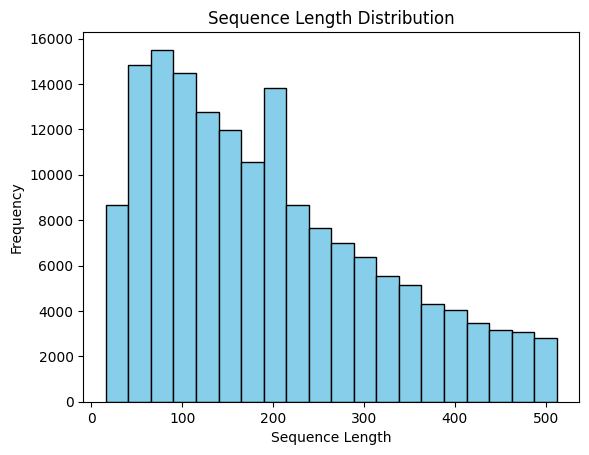

In [25]:
# 读取FASTA文件
fasta_file = '../data/5utr_95.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# 统计序列数量
num_sequence = len(sequences)
print(f"FASTA文件中共有 {num_sequence} 个序列。")

# 提取生物种类信息
species_codes = [record.description.split()[-1] for record in sequences]

# 统计每种生物种类的个数
species_count = Counter(species_codes)

# 打印生物种类及其数量
print("生物种类及其数量：")
total = 0
species_num_list = []
species_list = []
for species, count in species_count.items():
    total += 1
    species_list.append(species)
    species_num_list.append(count)
    print(f"{species}: {count}")

print(f"total number of species: {total}")

plt.figure()
plt.bar(species_list, species_num_list, color='skyblue', edgecolor='black')
plt.title("number of species")
plt.show()

# 获取所有序列的长度
sequence_lengths = [len(record.seq) for record in sequences]

# 绘制序列长度的分布图
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [2]:
from Bio import SeqIO
fasta_file = '../data/5utr_full.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))
num_sequences = len(sequences)
print(f"共有 {num_sequences} 个序列。")

共有 360322 个序列。
